Draft notebook for combininig the GJ 674 spectrum.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

20190301 Start with a simple plot of everything, may be good for exoupdate as well.

Text(0, 0.5, 'Flux (erg s$^{-1}$cm$^{-2}$\\AA$^{-1}$)')

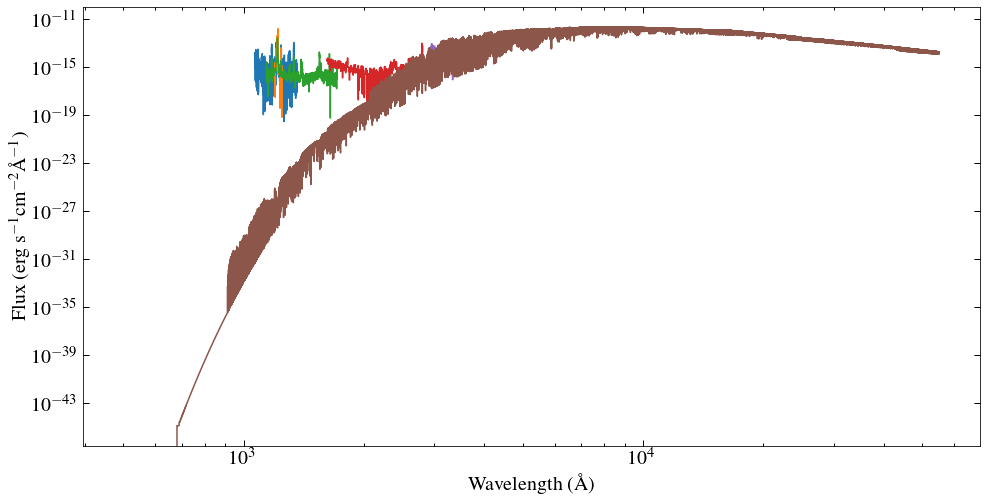

In [4]:
plt.figure(figsize = (14, 7))
plt.subplots_adjust(top = 0.98, right = 0.99, left = 0.1, bottom = 0.11)


#COS
data = readsav('../COS/GJ674_COS130M_Mm1_NOSCL_03apr18.sav')
mask = data['Flux'] > 0
plt.step(data['Wave'][mask], data['Flux'][mask])


#STIS
data = Table.read('../STIS/GJ674_G140M_coadd.ecsv')
mask = data['FLUX'] > 0
plt.step(data['WAVELENGTH'][mask], data['FLUX'][mask])
data = fits.getdata('../STIS/GJ674_G140L_noflare_x1d.fits', 1)[0]
mask = data['FLUX'] > 0
plt.step(data['WAVELENGTH'][mask], data['FLUX'][mask])
data = fits.getdata('../STIS/GJ674_G230L_x1d.fits')[0]
clip_st, clip_end = 30,-6 
mask = data['FLUX'][clip_st:clip_end] > 0
plt.step(data['WAVELENGTH'][clip_st:clip_end][mask], data['FLUX'][clip_st:clip_end][mask])
ccd = '../STIS/odlm21010_sx1.fits'
data = fits.getdata(ccd)[0]
clip_st, clip_end = 20,-1 #points to clip off ccd spectrum  
mask = data['FLUX'][clip_st:clip_end] > 0
plt.step(data['WAVELENGTH'][clip_st:clip_end][mask], data['FLUX'][clip_st:clip_end][mask])

#phoenix
w = fits.getdata('../PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits',0)
f = fits.getdata('../PHOENIX/lte03600-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')
mask = (w>data['WAVELENGTH'][-1])
scale = f[mask][0]/data['FLUX'][-1]
plt.step(w,f/scale, label= 'GJ674')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (\AA)', size=20)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
#plt.savefig('GJ674_rough.png', dpi=150)

#add the solar spectrum
#sol_spec =  readsav('../../../stuff/Solar-data.idlsav')
#sw = sol_spec['wave']*10
#sf = sol_spec['flux']*100
#scale2 = max(f/scale)/max(sf)
#mask = sw > 1100 
#plt.plot(sw[mask], sf[mask]*scale2, 'k--', label='Sun (scaled)' , alpha=0.5)

#plt.savefig('GJ674_rough_wSun.png', dpi=150)
#plt.legend()

Going to get photometery and test the Phoenix model before going any further.

How far does Phoenix go- can I do KF's suggestion of adding the emission lines to a model photosphere. Ok stretchs accross the entire range, good.